In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

%matplotlib inline

In [24]:
df = pd.read_csv("State_Averages.csv")
df.head()

,State or Nation,Cycle 1 Total Number of Health Deficiencies,Cycle 1 Total Number of Fire Safety Deficiencies,Cycle 2 Total Number of Health Deficiencies,Cycle 2 Total Number of Fire Safety Deficiencies,Cycle 3 Total Number of Health Deficiencies,Cycle 3 Total Number of Fire Safety Deficiencies,Previous Survey Number of Health Deficiencies,Average Number of Residents Per Day,Reported Nurse Aide Staffing Hours per Resident per Day,...,Percentage of short stay residents who were assessed and appropriately given the seasonal influenza vaccine,Percentage of short stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of short stay residents who newly received an antipsychotic medication,Percentage of long stay residents whose ability to move independently worsened,Percentage of long stay residents who received an antianxiety or hypnotic medication,Percentage of short stay residents who made improvements in function,Percentage of short stay residents who were rehospitalized after a nursing home admission,Percentage of short stay residents who had an outpatient emergency department visit,Percentage of short stay residents who were successfully discharged to the community,Processing Date
0,NATION,NaN,3.0,NaN,3.0,NaN,3.0,5.8,86.4,2.32,...,81.478004%,83.291367%,1.977782%,18.25062%,22.446278%,67.793374%,21.100346%,11.859575%,57.029904%,06/01/2018
1,AK,NaN,3.8,NaN,4.9,NaN,3.3,9.6,35.7,4.27,...,85.833141%,82.246366%,1.950982%,21.486559%,17.845459%,70.68435%,12.200076%,8.222515%,68.127998%,06/01/2018
2,AL,NaN,3.3,NaN,3.1,NaN,3.7,4.1,99.6,2.52,...,81.662465%,83.702514%,2.259746%,15.322916%,28.648515%,62.019543%,21.743648%,10.583969%,58.989532%,06/01/2018
3,AR,NaN,0.8,NaN,0.6,NaN,0.7,4.5,79.4,2.70,...,81.700609%,82.614705%,2.157267%,16.108273%,25.886907%,69.649043%,24.869366%,15.939919%,52.397543%,06/01/2018
4,AZ,NaN,2.8,NaN,2.6,NaN,3.5,3.6,79.0,2.38,...,88.790855%,92.26058%,1.300158%,19.777646%,21.391274%,65.106865%,21.481093%,11.788992%,62.972374%,06/01/2018


## Percentage of long-stay residents who have symptoms of depression	
This shows you the percentage of patients with signs of depression. Depression is a medical problem of the brain that can affect how you think, feel, and behave. 
Lower percentages are better.

In [25]:
depression = df[['State or Nation', 'Average Number of Residents Per Day', 'Percent of Long Stay Residents Who Have Depressive Symptoms']]
depression.sort_values(by='Percent of Long Stay Residents Who Have Depressive Symptoms', ascending=False).head(10)  

,State or Nation,Average Number of Residents Per Day,Percent of Long Stay Residents Who Have Depressive Symptoms
50,WA,75.3,9.974658%
23,ME,59.8,8.482571%
49,VT,69.3,8.365873%
17,IN,70.8,7.797748%
47,UT,54.4,7.369904%
36,NY,168.3,6.886257%
1,AK,35.7,6.578682%
18,KS,52.1,5.970667%
30,ND,69.4,5.172228%
11,GA,92.6,5.152%


In [26]:
#Major Depressive Episode in the Past Year Among Adults
national_avg = pd.read_csv("Average_Depression_States.csv")
national_avg.head()

,State Code,State_Region,Nation_State,Small Area Estimate,95% CI (Lower),95% CI (Upper),Type
0,AL,Alabama,Alabama,6.82%,5.87%,7.92%,3
1,AK,Alaska,Alaska,6.93%,6.02%,7.97%,3
2,AZ,Arizona,Arizona,6.43%,5.51%,7.48%,3
3,AR,Arkansas,Arkansas,7.98%,6.94%,9.17%,3
4,CA,California,California,6.10%,5.61%,6.62%,3


In [27]:
df_compare = national_avg.merge(depression, left_on='State Code', right_on='State or Nation')
df_compare.head()

,State Code,State_Region,Nation_State,Small Area Estimate,95% CI (Lower),95% CI (Upper),Type,State or Nation,Average Number of Residents Per Day,Percent of Long Stay Residents Who Have Depressive Symptoms
0,AL,Alabama,Alabama,6.82%,5.87%,7.92%,3,AL,99.6,1.143164%
1,AK,Alaska,Alaska,6.93%,6.02%,7.97%,3,AK,35.7,6.578682%
2,AZ,Arizona,Arizona,6.43%,5.51%,7.48%,3,AZ,79.0,2.392781%
3,AR,Arkansas,Arkansas,7.98%,6.94%,9.17%,3,AR,79.4,1.936882%
4,CA,California,California,6.10%,5.61%,6.62%,3,CA,86.6,0.743524%


In [28]:
df_compare = df_compare.drop('Type', axis=1)
df_compare.head()

,State Code,State_Region,Nation_State,Small Area Estimate,95% CI (Lower),95% CI (Upper),State or Nation,Average Number of Residents Per Day,Percent of Long Stay Residents Who Have Depressive Symptoms
0,AL,Alabama,Alabama,6.82%,5.87%,7.92%,AL,99.6,1.143164%
1,AK,Alaska,Alaska,6.93%,6.02%,7.97%,AK,35.7,6.578682%
2,AZ,Arizona,Arizona,6.43%,5.51%,7.48%,AZ,79.0,2.392781%
3,AR,Arkansas,Arkansas,7.98%,6.94%,9.17%,AR,79.4,1.936882%
4,CA,California,California,6.10%,5.61%,6.62%,CA,86.6,0.743524%


In [29]:
df_compare.rename(columns={'State_Region': 'State'}, inplace=True)
df_compare.rename(columns={'Small Area Estimate': 'State Depression Average'}, inplace=True)
df_compare.rename(columns={'Average Number of Residents Per Day': 'Avg Number Daily Residents'}, inplace=True)
df_compare.rename(columns={'State Depression Average': 'State_Depression_Average'}, inplace=True)
df_compare.rename(columns={'Percent of Long Stay Residents Who Have Depressive Symptoms': 'Elderly_Depression'}, inplace=True)

In [30]:
df_compare = df_compare.drop("State or Nation", axis=1)
df_compare = df_compare.drop("Nation_State", axis=1)
df_compare = df_compare.drop("95% CI (Lower)", axis=1)
df_compare = df_compare.drop("95% CI (Upper)", axis=1)

In [31]:
df_compare.sort_values(by='Elderly_Depression', ascending=False)

,State Code,State,State_Depression_Average,Avg Number Daily Residents,Elderly_Depression
44,WA,Washington,7.82%,75.3,9.974658%
18,ME,Maine,7.45%,59.8,8.482571%
42,VT,Vermont,7.99%,69.3,8.365873%
14,IN,Indiana,7.59%,70.8,7.797748%
41,UT,Utah,7.53%,54.4,7.369904%
31,NY,New York,6.53%,168.3,6.886257%
1,AK,Alaska,6.93%,35.7,6.578682%
16,KS,Kansas,7.25%,52.1,5.970667%
33,ND,North Dakota,6.50%,69.4,5.172228%
10,GA,Georgia,6.51%,92.6,5.152%


In [32]:
elders = df_compare.sort_values(by='Elderly_Depression', ascending=False)
elders = elders[['State', 'State_Depression_Average', 'Elderly_Depression']]
elders.head()

,State,State_Depression_Average,Elderly_Depression
44,Washington,7.82%,9.974658%
18,Maine,7.45%,8.482571%
42,Vermont,7.99%,8.365873%
14,Indiana,7.59%,7.797748%
41,Utah,7.53%,7.369904%


## Write a function to compare ` State_Depression_Average` to `Elderly Depression`

In [33]:
elders.State_Depression_Average = elders.State_Depression_Average.str.strip("%""")
elders.Elderly_Depression = elders.Elderly_Depression.str.strip("%""")

In [34]:
elders.State_Depression_Average = elders.State_Depression_Average.astype(float)
elders.Elderly_Depression = elders.Elderly_Depression.astype(float)

In [35]:
#avg_list = list(elders['State_Depression_Average'])
#avg_list

In [36]:
elder_list = list(elders['Elderly_Depression'])
elder_list

[9.974658,
 8.482571,
 8.365873,
 7.797748,
 7.369904,
 6.886257,
 6.578682,
 5.970667,
 5.172228,
 5.152,
 4.949912,
 4.876544,
 4.796637,
 4.752031,
 4.72614,
 4.708949,
 4.347196,
 4.231493,
 4.231493,
 4.05991,
 3.675596,
 3.646198,
 3.601019,
 3.559829,
 3.31988,
 3.287699,
 3.015568,
 2.695002,
 2.691173,
 2.609457,
 2.392781,
 2.305042,
 2.267479,
 2.170979,
 2.115345,
 2.01822,
 18.786234,
 12.788614,
 1.936882,
 1.724259,
 1.590505,
 1.314159,
 1.31361,
 1.302292,
 1.143164,
 1.078708,
 0.743524,
 0.734532]

# Function to Determine Where the Medicaid Depression Exceeds State Average

In [37]:
def depression_compare(row):
    
        if row['Elderly_Depression'] > row['State_Depression_Average']:
            return "Exceeds Average"
        
elders['Spike'] = elders.apply(depression_compare, axis=1)

In [38]:
spike = elders.sort_values(by='Spike').head(7)
spike['Difference'] = 1 - spike['State_Depression_Average']/spike['Elderly_Depression']
spike

,State,State_Depression_Average,Elderly_Depression,Spike,Difference
44,Washington,7.82,9.974658,Exceeds Average,0.216013
18,Maine,7.45,8.482571,Exceeds Average,0.121729
42,Vermont,7.99,8.365873,Exceeds Average,0.044929
14,Indiana,7.59,7.797748,Exceeds Average,0.026642
31,New York,6.53,6.886257,Exceeds Average,0.051734
13,Illinois,5.84,18.786234,Exceeds Average,0.689134
34,Ohio,7.54,12.788614,Exceeds Average,0.410413


In [39]:
difference = spike.sort_values(by='Difference', ascending=False)
difference

,State,State_Depression_Average,Elderly_Depression,Spike,Difference
13,Illinois,5.84,18.786234,Exceeds Average,0.689134
34,Ohio,7.54,12.788614,Exceeds Average,0.410413
44,Washington,7.82,9.974658,Exceeds Average,0.216013
18,Maine,7.45,8.482571,Exceeds Average,0.121729
31,New York,6.53,6.886257,Exceeds Average,0.051734
42,Vermont,7.99,8.365873,Exceeds Average,0.044929
14,Indiana,7.59,7.797748,Exceeds Average,0.026642


In [40]:
spike

,State,State_Depression_Average,Elderly_Depression,Spike,Difference
44,Washington,7.82,9.974658,Exceeds Average,0.216013
18,Maine,7.45,8.482571,Exceeds Average,0.121729
42,Vermont,7.99,8.365873,Exceeds Average,0.044929
14,Indiana,7.59,7.797748,Exceeds Average,0.026642
31,New York,6.53,6.886257,Exceeds Average,0.051734
13,Illinois,5.84,18.786234,Exceeds Average,0.689134
34,Ohio,7.54,12.788614,Exceeds Average,0.410413


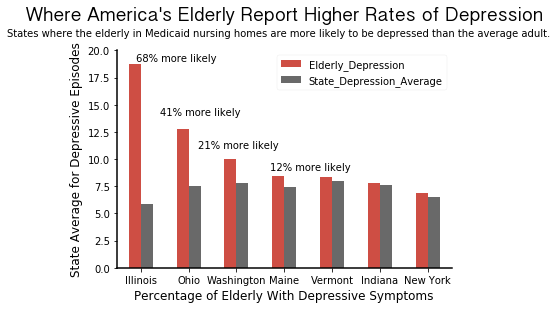

In [41]:
bar_colors = ['#CE4E44', '#696969'] 

ax = difference.sort_values(by='Elderly_Depression', ascending=False).plot(kind='bar', x='State', y=['Elderly_Depression', 'State_Depression_Average'], rot= 0, color=bar_colors)

ax.set_title("Where America's Elderly Report Higher Rates of Depression", pad=30, fontsize=20)
ax.title.set_fontname('Lao Sangam MN')

ax.set_xlabel("Percentage of Elderly With Depressive Symptoms")
ax.set_ylabel("State Average for Depressive Episodes")

ax.set_ylim((0, 20))

plt.gcf().text(0.5, .93, "States where the elderly in Medicaid nursing homes are more likely to be depressed than the average adult.", ha='center', fontsize=10)
    
ax.text(-.1, 19, "68% more likely")
ax.text(.4, 14, "41% more likely")
ax.text(1.2, 11, "21% more likely")
ax.text(2.7, 9, "12% more likely")
#ax.text(4, 8.8, "4% more likely")
#ax.text(5, 8.5, "2% more likely")
#ax.text(6, 8.0, "5% more likely")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)

plt.rcParams.update({  

  'patch.linewidth': 0.2,
  'patch.facecolor': '#348ABD',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 9.0,
  'axes.edgecolor': 'black',
  'axes.grid': False,
  'axes.linewidth': 1.5,
  'axes.labelsize': 'large',
  'axes.labelcolor': 'black',

})

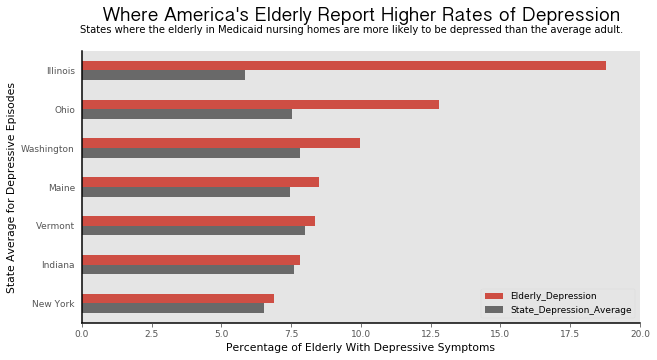

In [133]:
bar_colors = ['#CE4E44', '#696969'] 

ax = difference.sort_values(by='Elderly_Depression', ascending=False).plot(kind='barh', x='State', y=['Elderly_Depression', 'State_Depression_Average'], figsize=(10, 5), color=bar_colors)

ax.set_title("Where America's Elderly Report Higher Rates of Depression", pad=30, fontsize=20)
ax.title.set_fontname('Lao Sangam MN')

ax.set_xlabel("Percentage of Elderly With Depressive Symptoms")
ax.set_ylabel("State Average for Depressive Episodes")
ax.set_xlim((0, 20))

plt.gcf().text(0.5, .93, "States where the elderly in Medicaid nursing homes are more likely to be depressed than the average adult.", ha='center', fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)

plt.rcParams.update({  

  'patch.linewidth': 0.2,
  'patch.facecolor': '#ffffff',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 9.0,
  'axes.edgecolor': 'black',
  'axes.grid': False,
  'axes.linewidth': 1.5,
  'axes.labelsize': 'large',
  'axes.labelcolor': 'black',

})

ax.set_axisbelow(False)
ax.tick_params(which='major', left=False)

plt.gca().invert_yaxis()
plt.savefig("elderly_depression.pdf")
plt.show()

In [43]:
#Dig into Illinois, Ohio, Washington, Maine
top_states = df.loc[df['State or Nation'].isin(['IL','ME', "OH", "WA"])]
top_states[['State or Nation', 'Average Number of Residents Per Day', 'Percentage of long stay residents who received an antianxiety or hypnotic medication', 'Number of Fines', 'Fine Amount in Dollars']]

,State or Nation,Average Number of Residents Per Day,Percentage of long stay residents who received an antianxiety or hypnotic medication,Number of Fines,Fine Amount in Dollars
16,IL,91.5,21.510821%,0.3,6106.0
23,ME,59.8,18.66007%,0.1,1174.0
37,OH,76.9,24.014571%,0.4,7630.0
50,WA,75.3,15.317052%,1.5,41639.0


## I think I'm going to need to sort through and count the deficiencies // There are 344,584 of them!

In [44]:
import glob

In [45]:
filenames = glob.glob("Deficiencies/*.csv")
filenames

['Deficiencies/Deficiencies Cycle 1.csv',
 'Deficiencies/Deficiencies Cycle 2.csv',
 'Deficiencies/Deficiencies Cycle 3.csv']

In [46]:
dataframes = []

for filename in filenames:
    df = pd.read_csv(filename)
    df['filename'] = filename
    dataframes.append(df)

everything = pd.concat(dataframes, ignore_index=True)
everything.shape

(344584, 15)

In [47]:
everything

,Federal Provider Number,Provider Name,Survey Date,Deficiency Prefix,Deficiency Tag Number,Deficiency Description,Scope Severity Code,Deficiency Corrected,Correction Date,Standard Deficiency,Complaint Deficiency,Provider State,Location,Processing Date,filename
0,676395,THE HEALTHCARE RESORT OF PLANO,06/07/2017,F,322,Give proper treatment to residents with feedin...,D,"Deficient, Provider has date of correction",07/20/2017,True,False,TX,"3325 WEST PLANO PARKWAY\nPLANO, TX 75075\n(33....",06/01/2018,Deficiencies/Deficiencies Cycle 1.csv
1,676413,LEGEND OAKS HEALTHCARE AND REHABILITATION GARLAND,03/29/2018,F,759,Ensure medication error rates are not 5 percen...,E,"Deficient, Provider has plan of correction",05/11/2018,True,False,TX,"2625 BELT LINE ROAD\nGARLAND, TX 75044\n(32.94...",06/01/2018,Deficiencies/Deficiencies Cycle 1.csv
2,676406,TRUCARE LIVING CENTERS - SELMA,08/10/2017,F,498,Make sure that nurse aides show they have the ...,E,"Deficient, Provider has date of correction",08/15/2017,True,False,TX,"16550 RETAMA PARKWAY\nSELMA, TX 78154\n(29.589...",06/01/2018,Deficiencies/Deficiencies Cycle 1.csv
3,676389,MATADOR HEALTH AND REHABILITATION CENTER,08/17/2017,F,279,Develop a complete care plan that meets all th...,E,"Deficient, Provider has date of correction",08/24/2017,True,False,TX,"805 HARRISON ST\nMATADOR, TX 79244\n(34.024466...",06/01/2018,Deficiencies/Deficiencies Cycle 1.csv
4,676416,BRIGHTPOINTE AT LYTLE LAKE,05/26/2017,F,387,Make sure that doctors visit residents regular...,E,"Deficient, Provider has date of correction",06/20/2017,True,False,TX,"1201 CLARKS DR\nABILENE, TX 79602\n(32.439629,...",06/01/2018,Deficiencies/Deficiencies Cycle 1.csv
5,676383,INSPIRE NEW BOSTON,05/05/2017,F,490,Make sure that the facility is administered in...,E,"Deficient, Provider has date of correction",07/05/2017,True,False,TX,"210 RICE ST\nNEW BOSTON, TX 75570\n(33.46167, ...",06/01/2018,Deficiencies/Deficiencies Cycle 1.csv
6,676406,TRUCARE LIVING CENTERS - SELMA,08/10/2017,F,309,Provide necessary care and services to maintai...,E,"Deficient, Provider has date of correction",08/15/2017,True,False,TX,"16550 RETAMA PARKWAY\nSELMA, TX 78154\n(29.589...",06/01/2018,Deficiencies/Deficiencies Cycle 1.csv
7,676388,THE PAVILION AT CREEKWOOD,07/13/2017,F,469,Make sure there is a pest control program to p...,F,"Deficient, Provider has date of correction",07/14/2017,True,True,TX,"2100 CANNON DR\nMANSFIELD, TX 76063\n(32.57715...",06/01/2018,Deficiencies/Deficiencies Cycle 1.csv
8,676383,INSPIRE NEW BOSTON,05/05/2017,F,319,Give the right treatment and services to resid...,E,"Deficient, Provider has date of correction",06/02/2017,True,False,TX,"210 RICE ST\nNEW BOSTON, TX 75570\n(33.46167, ...",06/01/2018,Deficiencies/Deficiencies Cycle 1.csv
9,676391,WINDSOR CALALLEN,02/02/2018,F,686,Provide appropriate pressure ulcer care and pr...,E,"Deficient, Provider has date of correction",02/27/2018,True,False,TX,"4162 WILDCAT DR\nCORPUS CHRISTI, TX 78410\n(27...",06/01/2018,Deficiencies/Deficiencies Cycle 1.csv


In [48]:
plt.style.use('ggplot')

severity_count = everything.groupby(by='Scope Severity Code')['Provider State'].count()
severity_count.sort_values(ascending=False)
severity_count

Scope Severity Code
B      6024
C      7001
D    197886
E     91324
F     24665
G     10710
H       982
I        32
J      2872
K      2318
L       770
Name: Provider State, dtype: int64

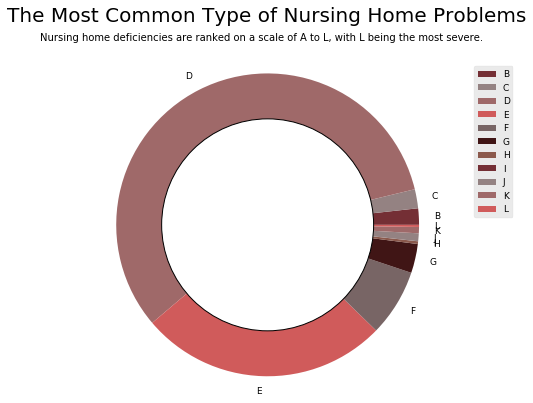

In [134]:
bar_coloring = ['#742f35', '#948282', '#9f6969', '#d05b5b', '#786565', '#401515', '#8b594c'] 
ax = severity_count.plot(kind='pie', colors=bar_coloring, legend=True, figsize=(6, 6))
plt.legend(loc="best", bbox_to_anchor=(1.25,1))

ax.set_ylabel('')

ax.set_title("The Most Common Type of Nursing Home Problems", pad=40, fontsize=20)
plt.gcf().text(0.5, .93, "Nursing home deficiencies are ranked on a scale of A to L, with L being the most severe.", ha='center', fontsize=10)

centre_circle = plt.Circle((0,0),0.70, color='black', fc='white', linewidth=1)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Make the Chart a Circle
plt.axis('equal')
plt.savefig("circlepie.svg")

In [50]:
deficiency_count = everything.groupby(by='Provider State')['Deficiency Description'].count()
deficiency_count.sort_values(ascending=False).head(15)

Provider State
CA    43434
TX    26608
IL    19086
OH    18108
PA    17515
MI    14703
FL    13061
IN    12630
KS    10506
MO    10266
NY     9848
WA     8641
WI     8357
OK     8181
MD     7811
Name: Deficiency Description, dtype: int64

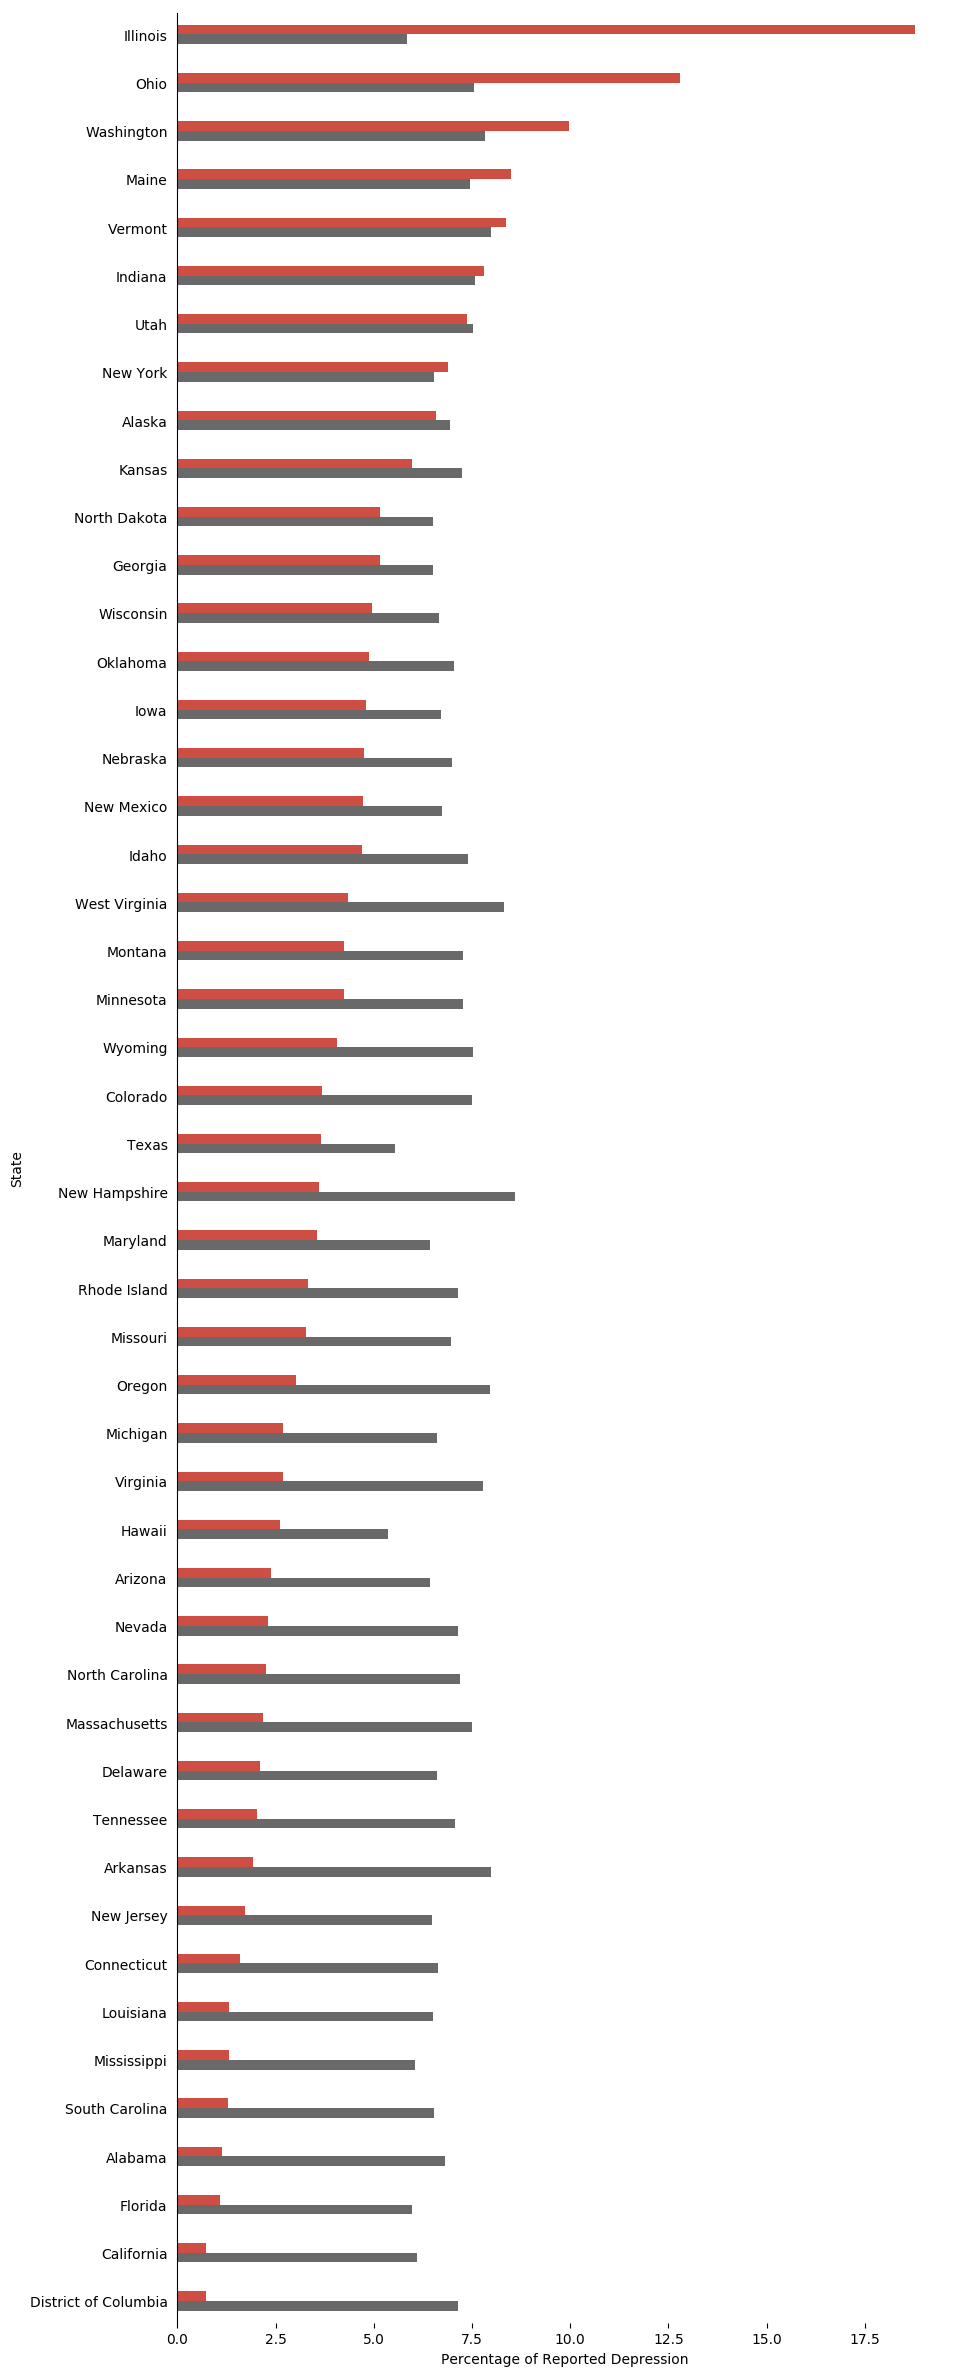

In [149]:
bar_colors = ['#696969', '#CE4E44'] 

ax = elders.sort_values(by='Elderly_Depression', ascending=True).plot(kind='barh', x='State', y=['State_Depression_Average', 'Elderly_Depression'], width=.4, legend=False, color=bar_colors, figsize=(10, 30))
ax.title.set_fontname('Lao Sangam MN')
ax.title.set_fontsize(20)
ax.set_xlabel("Percentage of Reported Depression")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams.update({  
  'axes.facecolor': '#f0f0f0',
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.grid': False,
  'axes.edgecolor': '#f0f0f0',
  'axes.linewidth': 3.0,
  'axes.titlesize': 'x-large',
  'patch.linewidth': 0.2,
  'patch.facecolor': '#348ABD',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'axes.grid': False,
  'axes.linewidth': 1.2,
  'figure.facecolor': 'white'

})

ax.set_axisbelow(False)
ax.tick_params(which='major', left=False)

plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

plt.savefig("all_states.pdf")
plt.show()